In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


Problem statement : understand the target customers for the marketing team to plan a strategy

Goal is to identify the most important shopping groups based on income, age and the mall shopping score.

Also we need to identify the ideal number of groups.

In [3]:
df=pd.read_csv(r'C:\Users\John\Documents\data science projects\Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Objective Market Segmantation : We will create subsets based on demographics behavioral criteria to better understand the target for the marketing activities.

The approach we will follow is the the following:

1. Perform EDA 
2. Use Kmeans to create our segments
3. Use summary statistics on the clusters
4. Visualize the results

Univariate analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


c:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


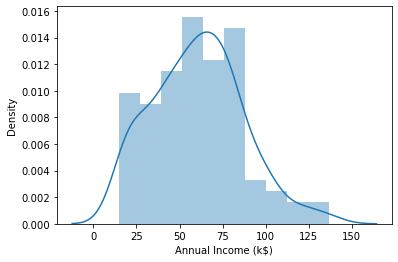

In [6]:
sns.distplot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
columns = [ 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

c:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

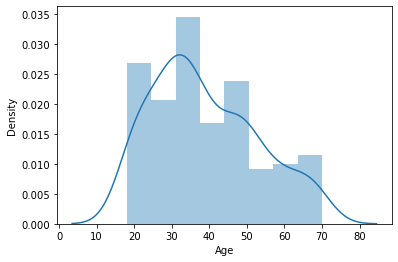

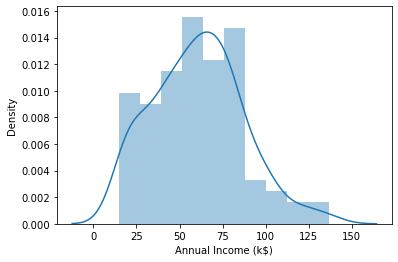

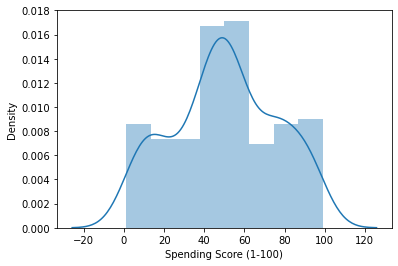

In [9]:
for i in columns :
    plt.figure()
    sns.distplot(df[i]);

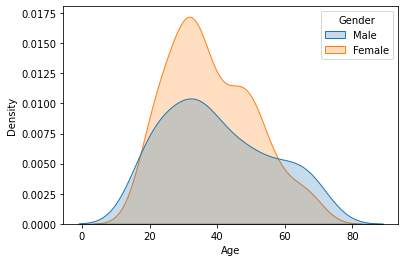

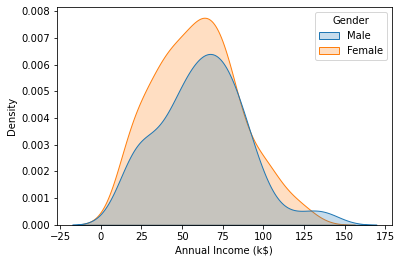

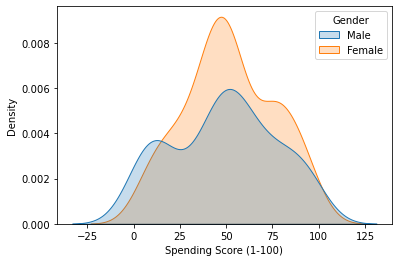

In [10]:
for i in columns :
    plt.figure()
    sns.kdeplot(df[i], shade= True , hue = df['Gender']);

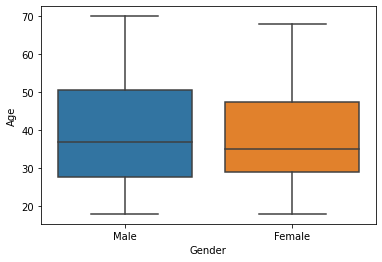

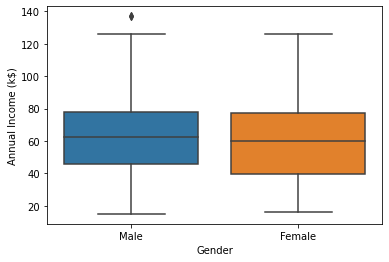

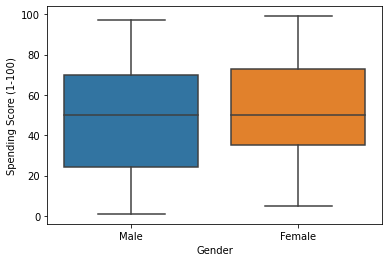

In [11]:
for i in columns :
    plt.figure()
    sns.boxplot(data = df , x = 'Gender' , y = df[i]);

In [12]:
df['Gender'].value_counts(normalize= True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

Bivariate analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

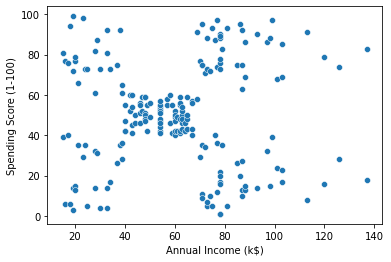

In [13]:
sns.scatterplot(data = df , x = 'Annual Income (k$)' , y= 'Spending Score (1-100)')

It is evident that there are about 5 clusters.

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df = df.drop('CustomerID', axis = 1)


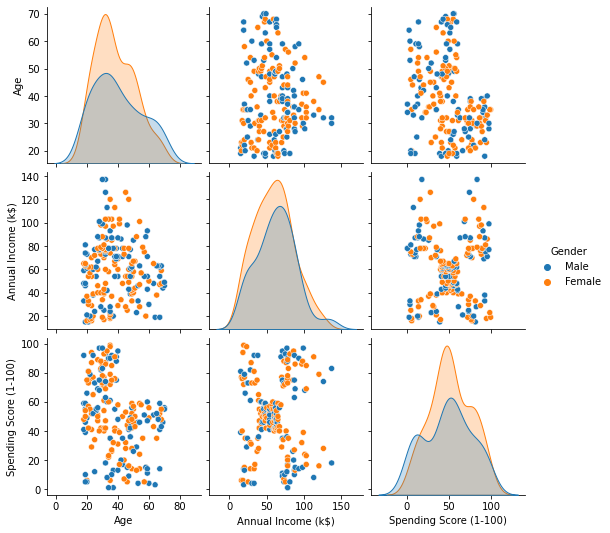

In [16]:
sns.pairplot(df , hue = 'Gender')

In [17]:
df.groupby(['Gender'])[columns].mean() 

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [18]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

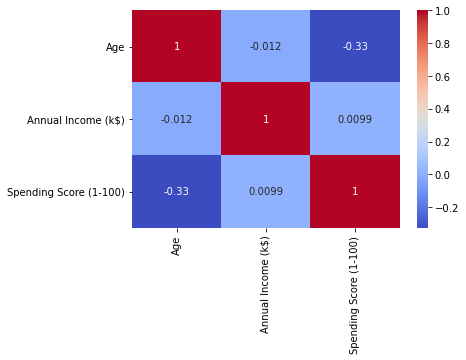

In [19]:
sns.heatmap(df.corr(), annot = True , cmap = 'coolwarm')

We will do univariate , bivariate and multivariate clustering

UNIVARIATE CLUSTERING

In [20]:
clustering1 = KMeans(n_clusters = 3)

In [21]:
clustering1.fit(df[['Annual Income (k$)']])

c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [22]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

We will perform kmeans with several k-values and then after collecting the inertias we will use the elbow method to select the best k-value.

In [23]:
df['income cluster'] =  clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [24]:
df['income cluster'].value_counts()

2    90
0    74
1    36
Name: income cluster, dtype: int64

In [25]:
clustering1.inertia_

23517.330930930926

In [26]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
    

c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

In [27]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3941.4163614163617,
 2827.308424908425,
 2255.949747474748,
 1743.4772727272725]

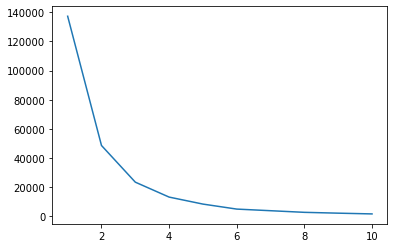

In [28]:
plt.plot(range(1,11) , inertia_scores)

In [29]:
df.groupby('income cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

<ipython-input-29-046b679c5cf4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('income cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


BIVARIATE CLUSTERING

In [30]:
clustering2 = KMeans(n_clusters = 5)

In [31]:
clustering2.fit(df[['Annual Income (k$)' , 'Spending Score (1-100)']])

c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [32]:
df['spending and income cluster'] = clustering2.labels_

In [33]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and income cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,0,4
2,Female,20,16,6,0,2
3,Female,23,16,77,0,4
4,Female,31,17,40,0,2


Optimize the number of clusters using inertia scores as we did before

In [34]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)' , 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

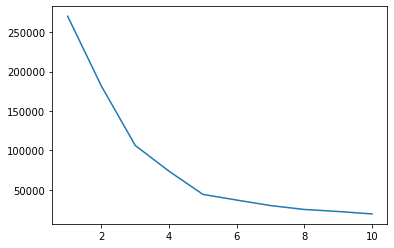

In [35]:
plt.plot(range(1,11) , inertia_scores2)

Optimal number of clusters is 5 according to the elbow method.

In [36]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x' , 'y']
centers.head()

,x,y
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,86.538462,82.128205
4,25.727273,79.363636


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

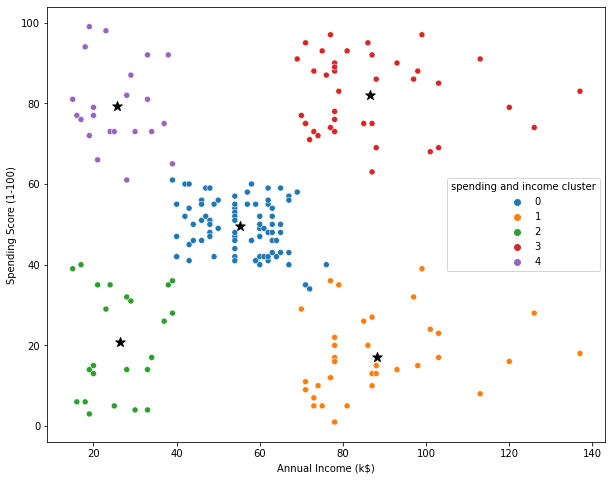

In [37]:
plt.figure(figsize= (10,8))
plt.scatter(x = centers['x'] , y = centers['y'] , s=100 , c='black' , marker = '*')
sns.scatterplot(data = df ,  x = 'Annual Income (k$)' , y= 'Spending Score (1-100)', hue= 'spending and income cluster' , palette = 'tab10')

In [38]:
pd.crosstab(df['spending and income cluster'] , df['Gender'], normalize = 'index')

Gender,Female,Male
spending and income cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.608696,0.391304
3,0.538462,0.461538
4,0.590909,0.409091


In [39]:
df.groupby('spending and income cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

<ipython-input-39-55df852530df>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('spending and income cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
spending and income cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


Ideally we would like to target cluster 0 because they have the highest spending score and annual income.
Apparently this cluster consists of 53% of females and 46% males aged around 32 years old.



People in cluster 3 that have high spending score and low annual income , probably only buy expensive items rarely (like computers , playstation etc.), so a campain could be launched centered around this fact.

MULTIVARIATE CLUSTERING


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scale = StandardScaler()

In [42]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and income cluster,Gender_Male
0,19,15,39,0,2,1
1,21,15,81,0,4,1
2,20,16,6,0,2,0
3,23,16,77,0,4,0
4,31,17,40,0,2,0


In [43]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'income cluster',
       'spending and income cluster', 'Gender_Male'],
      dtype='object')

In [44]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]

In [45]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [46]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [47]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

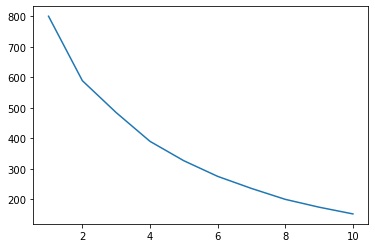

In [48]:
plt.plot(range(1,11) , inertia_scores3)

Optimal number of clusters is 4

In [49]:
clustering3 = KMeans(n_clusters = 4)
clustering3.fit(dff)

c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [50]:
df['multivariate cluster'] = clustering3.labels_

In [51]:
df.groupby('multivariate cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

<ipython-input-51-7ea5cbd88025>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('multivariate cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
multivariate cluster,,,
0,49.437500,62.416667,29.208333
1,28.392857,60.428571,68.178571
2,47.803571,58.071429,34.875000
3,28.250000,62.000000,71.675000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

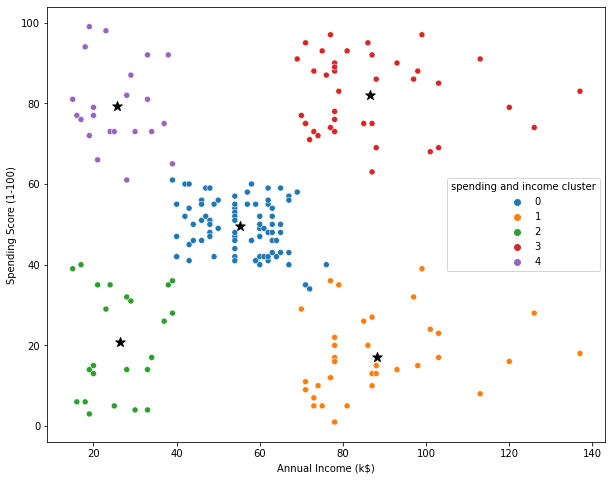

In [52]:
plt.figure(figsize= (10,8))
plt.scatter(x = centers['x'] , y = centers['y'] , s=100 , c='black' , marker = '*')
sns.scatterplot(data = df ,  x = 'Annual Income (k$)' , y= 'Spending Score (1-100)', hue= 'spending and income cluster' , palette = 'tab10')

In [53]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and income cluster,multivariate cluster
0,Male,19,15,39,0,2,3
1,Male,21,15,81,0,4,3
2,Female,20,16,6,0,2,2
3,Female,23,16,77,0,4,1
4,Female,31,17,40,0,2,2


In [54]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and income cluster,multivariate cluster
0,Male,19,15,39,0,2,3
1,Male,21,15,81,0,4,3
2,Female,20,16,6,0,2,2
3,Female,23,16,77,0,4,1
4,Female,31,17,40,0,2,2
...,...,...,...,...,...,...,...
195,Female,35,120,79,1,3,1
196,Female,45,126,28,1,1,2
197,Male,32,126,74,1,3,3
198,Male,32,137,18,1,1,0


In [55]:
df.groupby('multivariate cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

<ipython-input-55-7ea5cbd88025>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('multivariate cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
multivariate cluster,,,
0,49.437500,62.416667,29.208333
1,28.392857,60.428571,68.178571
2,47.803571,58.071429,34.875000
3,28.250000,62.000000,71.675000


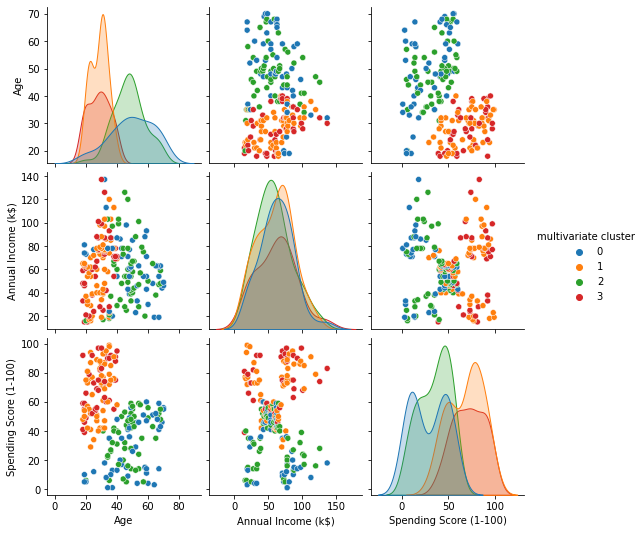

In [56]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','multivariate cluster']], hue = 'multivariate cluster' , palette = 'tab10')

In [57]:
from sklearn.decomposition import PCA
pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','multivariate cluster']])


In [88]:
from sklearn.metrics import silhouette_score
silhouette = []
inertia_scores4 = []
for i in range(2,11):
    kmeans4 = KMeans(n_clusters = i)
    kmeans4.fit(reduced_data)
    S_score = silhouette_score(reduced_data, kmeans4.labels_)
    silhouette.append(S_score)
    print(S_score)
    inertia_scores4.append(kmeans4.inertia_)

c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.3425561276495098


c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.4510333136307729


c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.4991241634685123


c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5525676664142312


c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5363663582888291


c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5231726780981072


c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.4467140750767448


c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.45388080043054724


c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.44461638768613865


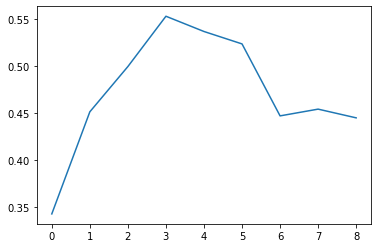

In [89]:
plt.plot(silhouette)

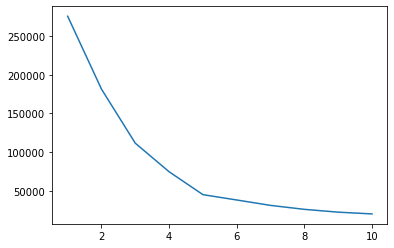

In [59]:
plt.plot(range(1,11) , inertia_scores4)

Optimal number of clusters according to silhouette score is 3 and according to eblow method is 3 or 4 , so we pick 3.

Run KMeans on the reduced PCA data

In [60]:
reduced_data = pd.DataFrame(reduced_data , columns = ['pca1' , 'pca2'])

In [61]:
reduced_data.head()

,pca1,pca2
0,-31.700866,-33.162013
1,1.037613,-56.852200
2,-57.337797,-13.393323
3,-1.933223,-53.481264
4,-32.028822,-30.539378


In [91]:
clustering4 = KMeans(n_clusters= 3)
clustering4.fit(reduced_data)
df['pca cluster'] = clustering4.labels_

c:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

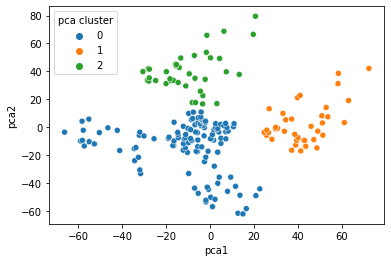

In [92]:
sns.scatterplot(data = reduced_data , x = 'pca1' , y= 'pca2' , hue = df['pca cluster'] , palette = 'tab10')

Clusters are well defined

Save the clustering result to a csv for further visualization/reporting.

In [93]:
df.to_csv('Clustering.csv')